# Calculate the porphyrin dimensions

In [2]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1

# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
        'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
        'c-f':average(1.34),
        'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = (cc_bond*(3*mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

10.346864409554044 Angstroms


# Define and execute the solution simulation

In [28]:
from scipy.constants import micro
from uncertainties import ufloat
from sigfig import round
from math import isclose
%run ../../pdipy/pdi.py
%matplotlib inline

# execute the simulation
target_reduction = 7.6
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:    
    # determine the experimental result
    if photosensitizer_molar == 20*micro:
        actual_value = 0.7          
    elif photosensitizer_molar == 5*micro:
        actual_value = 0.85
    elif photosensitizer_molar == 10*micro:
        actual_value = 0.85
        
    # execute the simulation
    pdi = PDI(verbose = True, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = {
            'formula': {
                'value': 'C44_H38_N8_I4'   # mass with iodides included, sans iodides 678.84,
            },
            'dimensions':{
                'length (A)': total_length,
                'width (A)': total_length,
                'depth (A)': 1.5,
                'shape': 'disc',
            }
        },
        photosensitizer_molar = photosensitizer_molar,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = {
            "visible_proportion": {
              "value": (700-390)/(700-380),
            }
        }, 
        measurement = {
            'irradiance': 4
        }
    )
    pdi.simulate(
        export_name = f'Beirao_et_al, {int(photosensitizer_molar/micro)} uM solution',
        figure_title = f'{round(photosensitizer_molar, 3)} M of tetrakis-porphyrin',
        experimental_data = {
            'x': [actual_value],
            'y': [target_reduction]
        },
        display_fa_oxidation = True,
        export_contents = False
    )
    display(pdi.processed_data)

    # affirm the accuracy of the prediction
    value, unit = pdi.parse_data(target_reduction)    
    if value is not None:
        actual_value = 1
        tolerance = actual_value/2
        acceptable_range_float = ufloat(actual_value, tolerance)
        if isclose(value, actual_value, abs_tol=tolerance):
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.')
    else:
        print('--> ERROR: The value was never observed in the simulation predictions.')
    print('\n\n\n\n')

The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-6
photons per timestep: 
2.7429539124364527e-06
effective excitation watts: 
4.3E-3


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:83: DeprecationWarning:

invalid escape sequence \.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89

Exception: Antimony: Error in model string, line 4:  syntax error, unexpected '\'', expecting ',' or '}'

# Define and execute the biofilm simulation

The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-6
photons per timestep: 
2.62005585372792e-06
effective excitation watts: 
4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*0.000817817417919398*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 702.49688*so*fa;
  _J5: so + eps => o_eps + mo; 37.75*so*eps;

  // Species initializations:
  ps = 3.17637577539033e-07;
  e_ps = 4.67583601418127e-06;
  mo = 0.000281032940294196;
  so = 2.21080571866792e-07;
  b_ps = 6.526

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:83: DeprecationWarning:

invalid escape sequence \.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light_source.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pd

,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,5.000000e-06,0.000000,0.000281,0.000000e+00,0.000000e+00,0.010976,0.000000,1130.004183,0.000000
180.753138,3.180512e-07,0.000005,0.000281,1.775984e-07,2.449320e-11,0.010732,0.000245,1128.636232,1.367950
361.506276,3.180496e-07,0.000005,0.000281,1.777527e-07,4.900757e-11,0.010492,0.000484,1127.268752,2.735431
542.259414,3.180480e-07,0.000005,0.000281,1.779072e-07,7.354312e-11,0.010258,0.000718,1125.901742,4.102441
723.012552,3.180465e-07,0.000005,0.000281,1.780619e-07,9.809988e-11,0.010029,0.000948,1124.535203,5.468979
...,...,...,...,...,...,...,...,...,...
42476.987448,3.176453e-07,0.000005,0.000281,2.202227e-07,6.404790e-09,0.000030,0.010946,823.058551,306.945632
42657.740586,3.176434e-07,0.000005,0.000281,2.204367e-07,6.435150e-09,0.000029,0.010947,821.822091,308.182092
42838.493724,3.176414e-07,0.000005,0.000281,2.206510e-07,6.465540e-09,0.000028,0.010948,820.586289,309.417894


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.022289,0.936385,0.009790,1.196440,0.063113,0.028313
0.100418,0.044100,0.936380,0.019588,1.196408,0.064781,0.029087
0.150628,0.065443,0.936376,0.029394,1.196377,0.070295,0.031655
0.200837,0.086327,0.936371,0.039209,1.196345,0.082422,0.037357
0.251046,0.106762,0.936366,0.049033,1.196314,0.103861,0.047625
...,...,...,...,...,...,...
11.799163,0.997255,0.935190,2.561529,1.188358,0.999793,3.683790
11.849372,0.997331,0.935184,2.573680,1.188320,0.999793,3.684926
11.899582,0.997405,0.935179,2.585842,1.188282,0.999794,3.686045


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:




,parameter,value
0,surface_system,False
1,so_diffusion_m,8.0000E-8
2,timestep_s,1.8000E2
3,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
4,solution_depth_m,1.2670E-2
5,solution_sqr_m,1.9300E-4
6,solution_cub_m,2.4453E-6
7,bacterial_cfu_ml,1.0000E8
8,biofilm,True
9,bacterial_specie,S_aureus


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,cell_radius_m,6.0676E-5
3,membrane_cub_m,1.8504E-16
4,fa_mass_proportion,1.6130E-28
5,photosensitizer_molar,5.0000E-6
6,photosensitizers,7.3630E15
7,molecular_volume_cub_m,1.2674E-27
8,volume_proportion,3.8164E-6
9,photon_moles_per_timestep,2.6201E-6


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.022289,0.936385,0.009790,1.196440,0.063113,0.028313
0.100418,0.044100,0.936380,0.019588,1.196408,0.064781,0.029087
0.150628,0.065443,0.936376,0.029394,1.196377,0.070295,0.031655
0.200837,0.086327,0.936371,0.039209,1.196345,0.082422,0.037357
0.251046,0.106762,0.936366,0.049033,1.196314,0.103861,0.047625
...,...,...,...,...,...,...
11.799163,0.997255,0.935190,2.561529,1.188358,0.999793,3.683790
11.849372,0.997331,0.935184,2.573680,1.188320,0.999793,3.684926
11.899582,0.997405,0.935179,2.585842,1.188282,0.999794,3.686045


hours to target: 9.439330543933055
The prediction of 9.439330543933055 is within the 6.5+/-3.2 tolerance of the actual value.





The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 1.5E16 photosensitizers = (1.9E-11 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 7.6E-6
photons per timestep: 
2.62005585372792e-06
effective excitation watts: 
4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*0.000817817417919398*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 702.49688*so*fa;
  _J5: so + eps => o_eps + mo; 37.75*so*eps;

  // Species initializations:
 

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light_source.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy

,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,1.000000e-05,0.000000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000,1130.004183,0.000000
180.753138,6.360992e-07,0.000009,0.000281,3.552804e-07,9.795322e-11,1.049266e-02,0.000484,1127.270478,2.733705
361.506276,6.360930e-07,0.000009,0.000281,3.558976e-07,1.960756e-10,1.002943e-02,0.000947,1124.538656,5.465527
542.259414,6.360867e-07,0.000009,0.000281,3.565165e-07,2.943675e-10,9.585905e-03,0.001391,1121.808724,8.195459
723.012552,6.360805e-07,0.000009,0.000281,3.571371e-07,3.928295e-10,9.161267e-03,0.001815,1119.080686,10.923496
...,...,...,...,...,...,...,...,...,...
42476.987448,6.342703e-07,0.000009,0.000281,5.583698e-07,2.885013e-08,1.847589e-08,0.010976,553.111655,576.892528
42657.740586,6.342605e-07,0.000009,0.000281,5.595431e-07,2.900393e-08,1.721008e-08,0.010976,551.006106,578.998077
42838.493724,6.342507e-07,0.000009,0.000281,5.607192e-07,2.915804e-08,1.602856e-08,0.010976,548.904172,581.100011


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.044073,0.936380,0.019575,1.196408,0.102563,0.046996
0.100418,0.086275,0.936371,0.039185,1.196346,0.111318,0.051254
0.150628,0.126683,0.936362,0.058828,1.196283,0.148135,0.069629
0.200837,0.165369,0.936353,0.078505,1.196220,0.234815,0.116234
0.251046,0.202405,0.936343,0.098217,1.196157,0.371304,0.201559
...,...,...,...,...,...,...
11.799163,0.999998,0.933688,5.773856,1.178408,1.000000,6.888218
11.849372,0.999998,0.933674,5.804678,1.178313,1.000000,6.909133
11.899582,0.999999,0.933659,5.835566,1.178219,1.000000,6.930629


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:




,parameter,value
0,surface_system,False
1,so_diffusion_m,8.0000E-8
2,timestep_s,1.8000E2
3,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
4,solution_depth_m,1.2670E-2
5,solution_sqr_m,1.9300E-4
6,solution_cub_m,2.4453E-6
7,bacterial_cfu_ml,1.0000E8
8,biofilm,True
9,bacterial_specie,S_aureus


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,cell_radius_m,6.0676E-5
3,membrane_cub_m,1.8504E-16
4,fa_mass_proportion,1.6130E-28
5,photosensitizer_molar,1.0000E-5
6,photosensitizers,14726001021835598.0
7,molecular_volume_cub_m,1.2674E-27
8,volume_proportion,7.6327E-6
9,photon_moles_per_timestep,2.6201E-6


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.044073,0.936380,0.019575,1.196408,0.102563,0.046996
0.100418,0.086275,0.936371,0.039185,1.196346,0.111318,0.051254
0.150628,0.126683,0.936362,0.058828,1.196283,0.148135,0.069629
0.200837,0.165369,0.936353,0.078505,1.196220,0.234815,0.116234
0.251046,0.202405,0.936343,0.098217,1.196157,0.371304,0.201559
...,...,...,...,...,...,...
11.799163,0.999998,0.933688,5.773856,1.178408,1.000000,6.888218
11.849372,0.999998,0.933674,5.804678,1.178313,1.000000,6.909133
11.899582,0.999999,0.933659,5.835566,1.178219,1.000000,6.930629


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light_source.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy

hours to target: 5.1715481171548126
The prediction of 5.1715481171548126 is within the 6.5+/-3.2 tolerance of the actual value.





The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 2.9E16 photosensitizers = (3.7E-11 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 1.5E-5
photons per timestep: 
2.62005585372792e-06
effective excitation watts: 
4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*0.000817817417919398*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 702.49688*so*fa;
  _J5: so + eps => o_eps + mo; 37.75*so*eps;

  // Species initializations:

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:651: RuntimeWarning:

invalid value encountered in log10



,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,0.000020,0.000000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000,1130.004183,0.000000
180.753138,0.000001,0.000019,0.000281,7.108921e-07,3.916554e-10,1.003058e-02,0.000946,1124.545549,5.458634
361.506276,0.000001,0.000019,0.000281,7.133610e-07,7.846621e-10,9.163368e-03,0.001813,1119.094480,10.909703
542.259414,0.000001,0.000019,0.000281,7.158431e-07,1.179027e-09,8.368500e-03,0.002608,1113.651023,16.353159
723.012552,0.000001,0.000019,0.000281,7.183384e-07,1.574758e-09,7.640166e-03,0.003336,1108.215226,21.788957
...,...,...,...,...,...,...,...,...,...
42476.987448,0.000001,0.000019,0.000279,1.783077e-06,1.500335e-07,1.492103e-17,0.010976,175.566628,954.437555
42657.740586,0.000001,0.000019,0.000279,1.789110e-06,1.510118e-07,8.979979e-18,0.010976,173.439929,956.564253
42838.493724,0.000001,0.000019,0.000279,1.795130e-06,1.519933e-07,-3.354438e-18,0.010976,171.331949,958.672234


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.086171,0.936371,0.039135,1.196346,0.137616,0.064299
0.100418,0.165177,0.936353,0.078406,1.196220,0.229709,0.113345
0.150628,0.237593,0.936334,0.117813,1.196094,0.506622,0.306820
0.200837,0.303948,0.936316,0.157358,1.195968,0.765977,0.630742
0.251046,0.364729,0.936297,0.197041,1.195841,0.895020,0.978895
...,...,...,...,...,...,...
11.648536,1.000000,0.929501,14.273349,1.151820,1.000000,9.432950
11.698745,1.000000,0.929456,14.423111,1.151541,1.000000,9.563201
11.748954,1.000000,0.929411,14.632370,1.151261,1.000000,9.744774


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:585: UserWarning:




,parameter,value
0,surface_system,False
1,so_diffusion_m,8.0000E-8
2,timestep_s,1.8000E2
3,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
4,solution_depth_m,1.2670E-2
5,solution_sqr_m,1.9300E-4
6,solution_cub_m,2.4453E-6
7,bacterial_cfu_ml,1.0000E8
8,biofilm,True
9,bacterial_specie,S_aureus


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,cell_radius_m,6.0676E-5
3,membrane_cub_m,1.8504E-16
4,fa_mass_proportion,1.6130E-28
5,photosensitizer_molar,2.0000E-5
6,photosensitizers,29452002043671196.0
7,molecular_volume_cub_m,1.2674E-27
8,volume_proportion,1.5265E-5
9,photon_moles_per_timestep,2.6201E-6


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.086171,0.936371,0.039135,1.196346,0.137616,0.064299
0.100418,0.165177,0.936353,0.078406,1.196220,0.229709,0.113345
0.150628,0.237593,0.936334,0.117813,1.196094,0.506622,0.306820
0.200837,0.303948,0.936316,0.157358,1.195968,0.765977,0.630742
0.251046,0.364729,0.936297,0.197041,1.195841,0.895020,0.978895
...,...,...,...,...,...,...
11.648536,1.000000,0.929501,14.273349,1.151820,1.000000,9.432950
11.698745,1.000000,0.929456,14.423111,1.151541,1.000000,9.563201
11.748954,1.000000,0.929411,14.632370,1.151261,1.000000,9.744774


hours to target: 4.117154811715481
The prediction of 4.117154811715481 is within the 6.5+/-3.2 tolerance of the actual value.







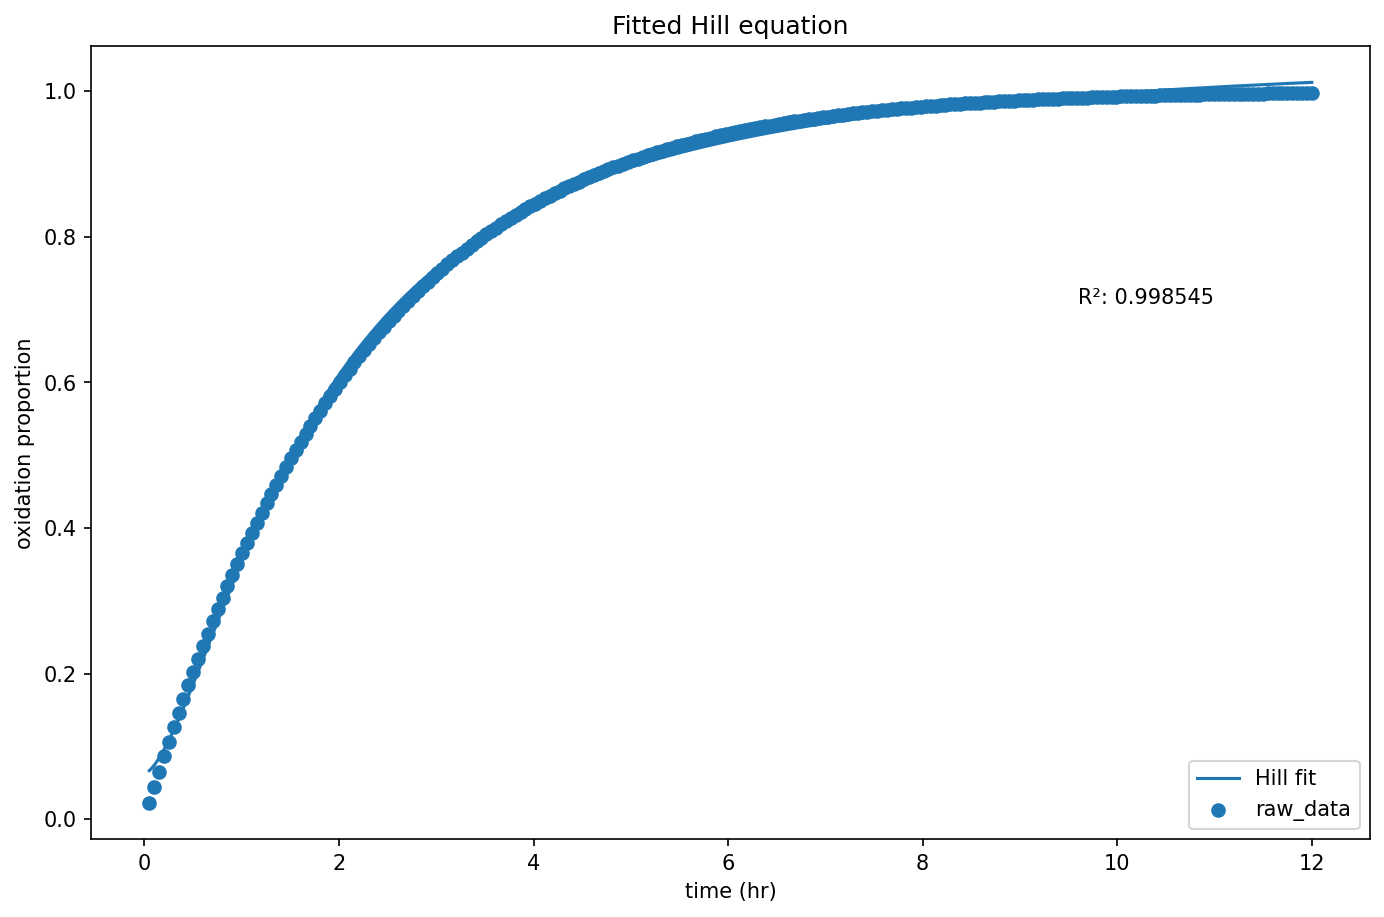

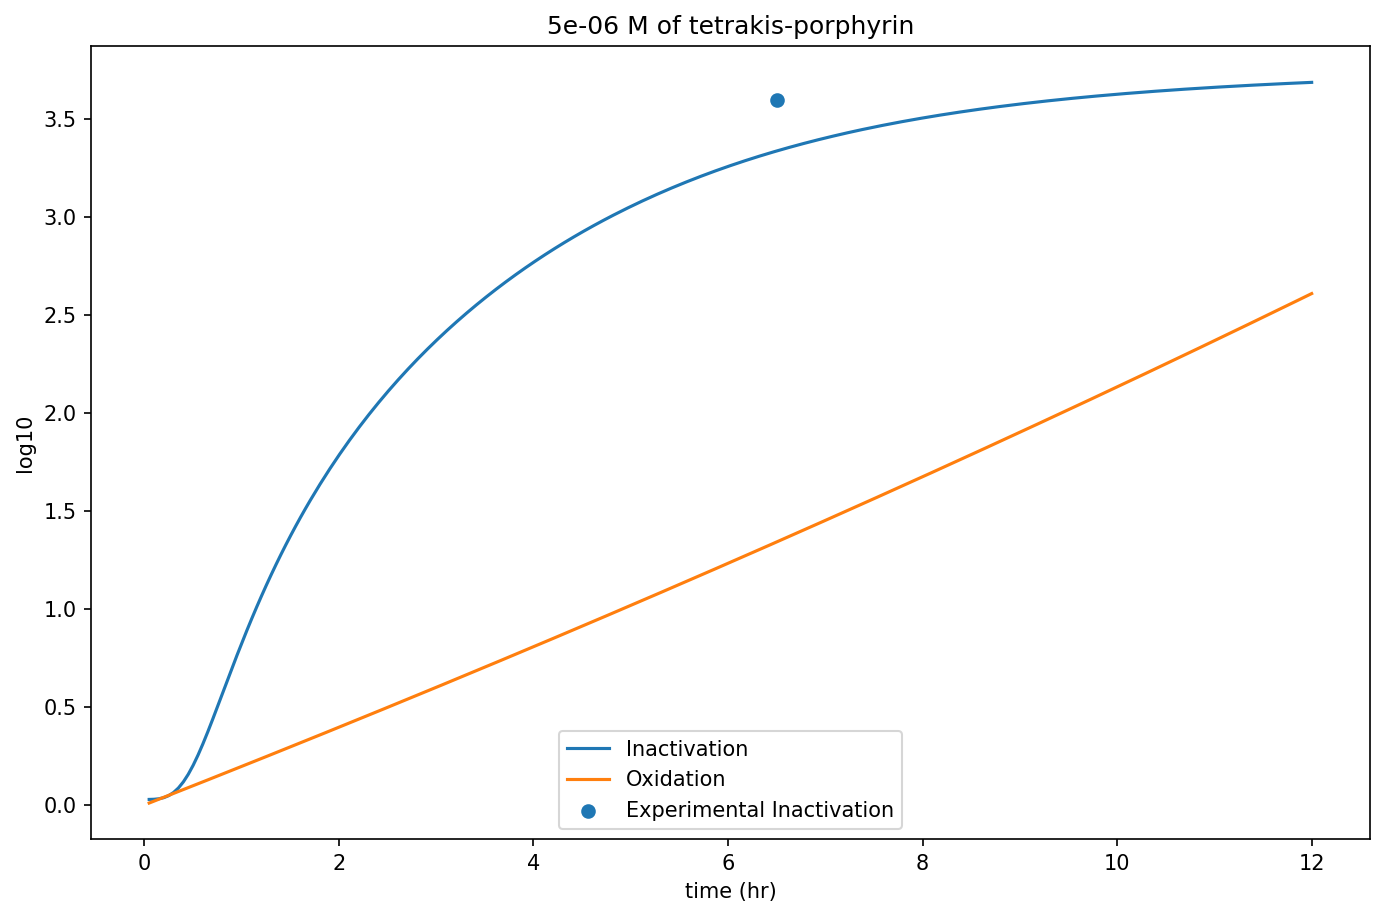

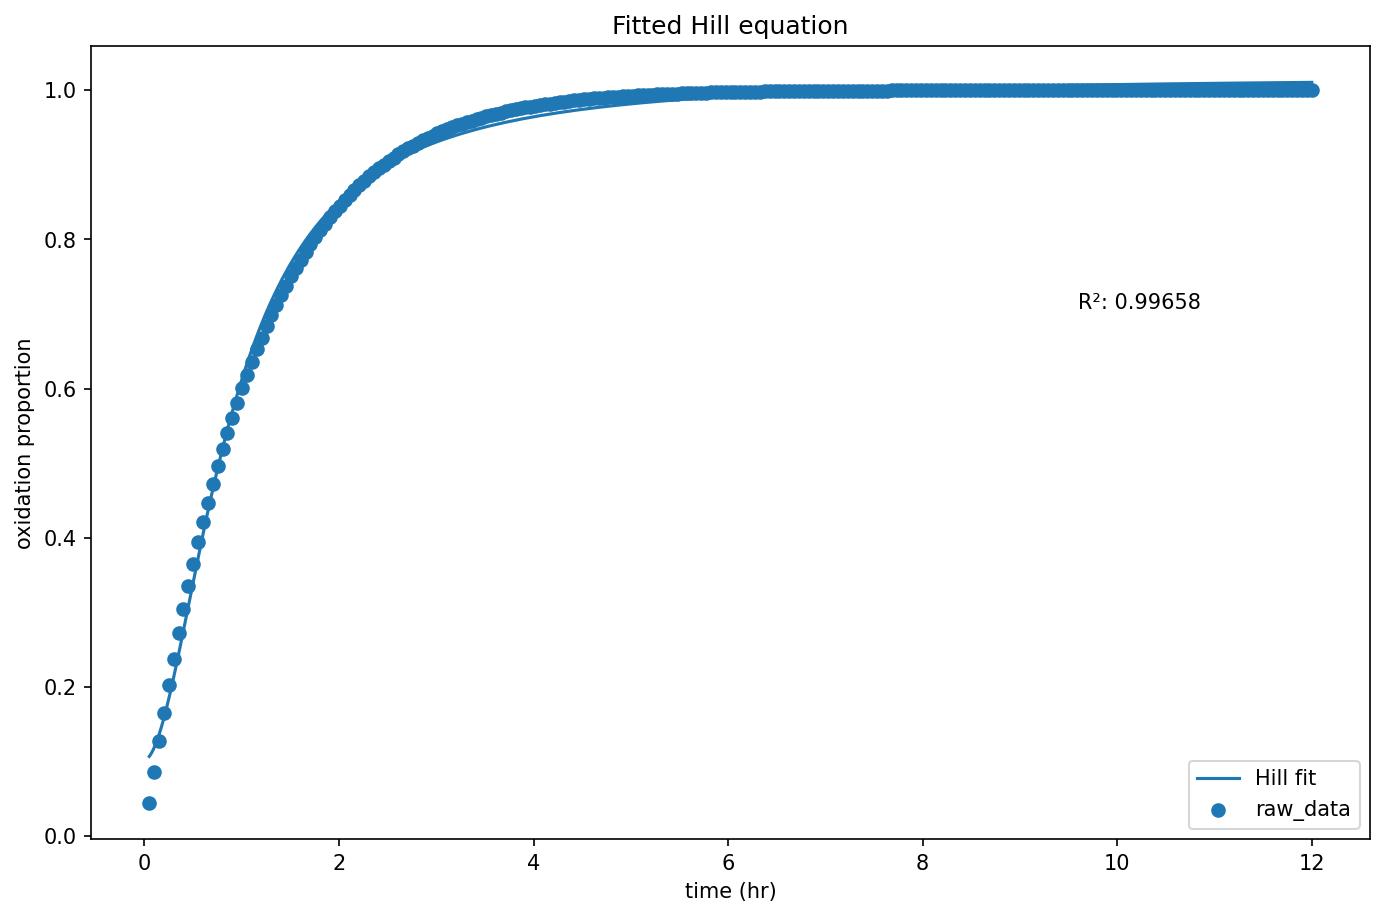

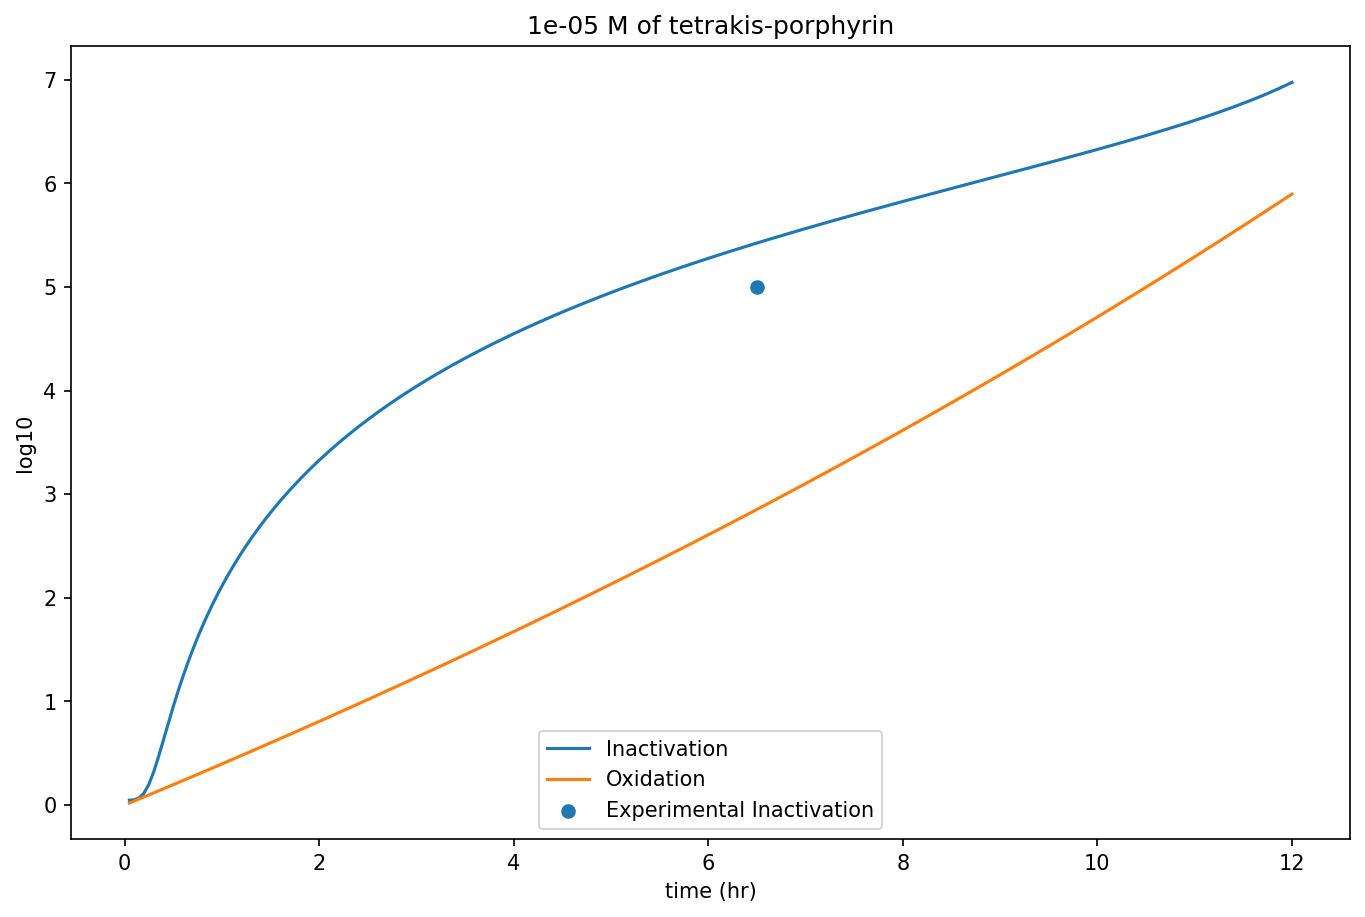

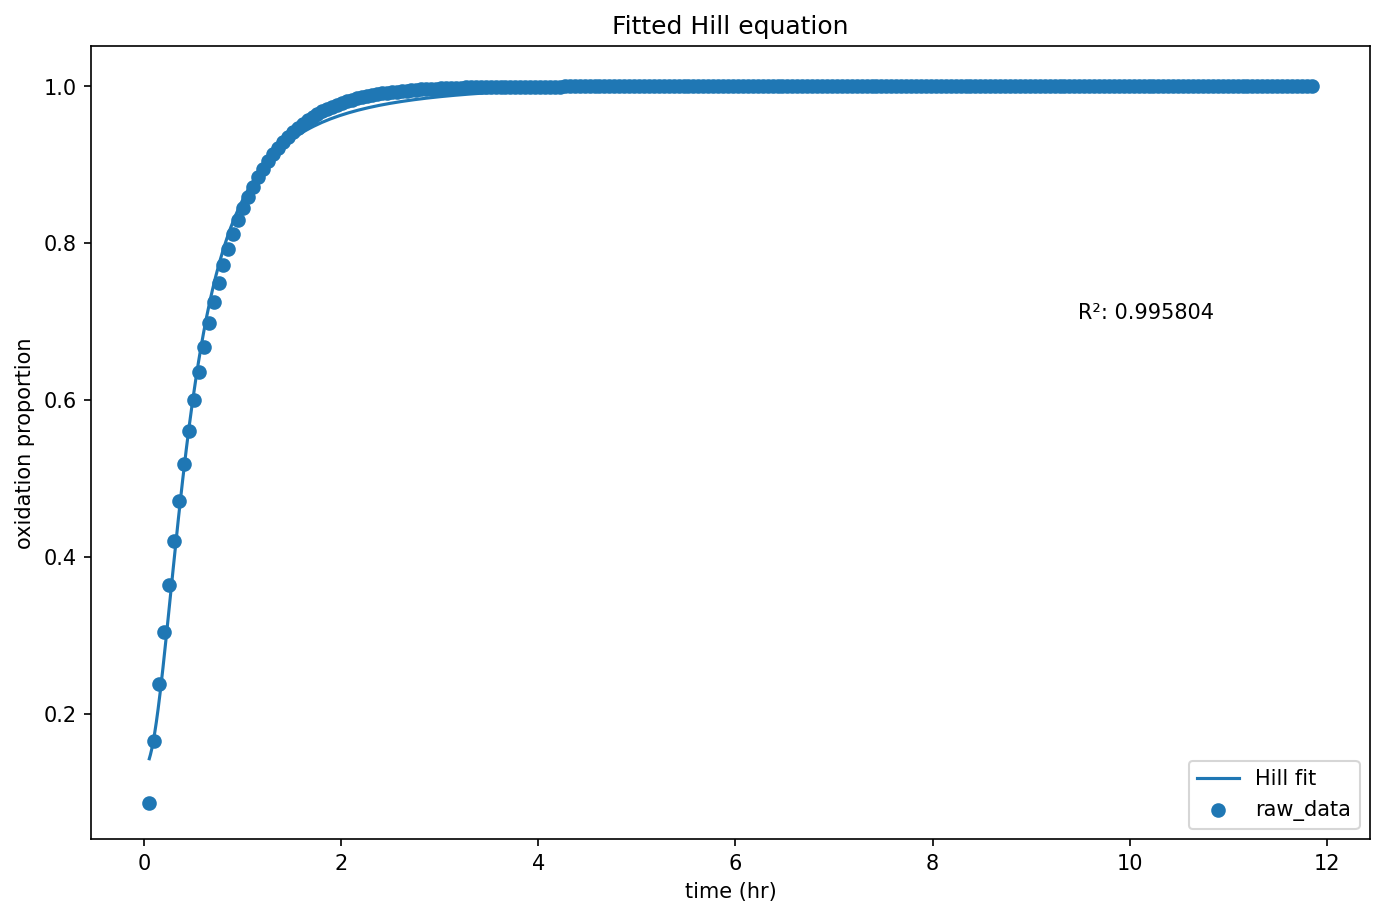

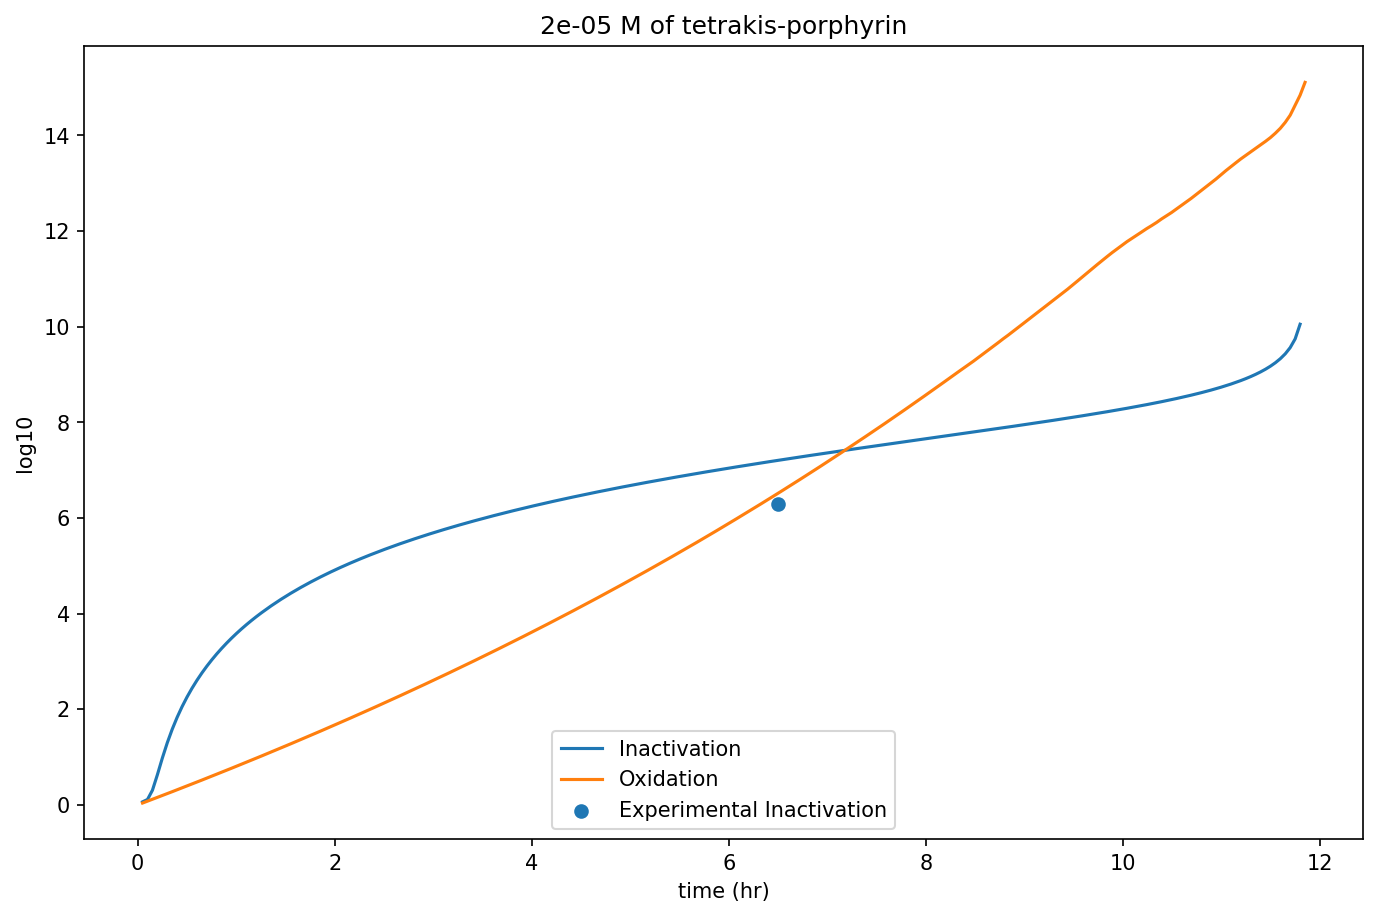

In [11]:
from scipy.constants import micro
from uncertainties import ufloat
from math import isclose
%run ../../pdipy/pdi.py
%matplotlib inline

# execute the simulation
target_reduction = 7.6
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:
    # determine the experimental result
    actual_value = 6.5
    if photosensitizer_molar == 20*micro:
        log_reduction = 6.3          
    elif photosensitizer_molar == 5*micro:
        log_reduction = 3.6
    elif photosensitizer_molar == 10*micro:
        log_reduction = 5
        
    # execute the simulation
    pdi = PDI(verbose = True, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        biofilm = True,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = {
            'formula': {
                'value': 'C44_H38_N8_I4'   # mass with iodides included, sans iodides 678.84,
            },
            'dimensions':{
                'length (A)': total_length,
                'width (A)': total_length,
                'depth (A)': 1.5,
                'shape': 'disc',
            }
        },
        photosensitizer_molar = photosensitizer_molar,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = {
            "visible_proportion": {
              "value": (700-390)/(700-380),
            }
        }, 
        measurement = {
            'irradiance': 4
        }
    )
    pdi.simulate(
        export_name = f'Beirao_et_al, biofilm, {int(photosensitizer_molar/micro)} uM solution',
        figure_title = f'{round(photosensitizer_molar, 3)} M of tetrakis-porphyrin',
        experimental_data = {
            'x': [actual_value],
            'y': [log_reduction]
        },
        display_fa_oxidation = True,
        export_contents = True
    )
    display(pdi.processed_data)

    value, unit = pdi.parse_data(
        log_reduction = log_reduction
    )    
        
    if value is not None:
        tolerance = actual_value/2
        acceptable_range_float = ufloat(actual_value, tolerance)
        if isclose(value, actual_value, abs_tol=tolerance):
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.')
    
    print('\n\n\n\n')